# Week 2 Assignment

The question can be found [here](https://github.com/lmoroney/dlaicourse/blob/master/Exercises/Exercise%202%20-%20Handwriting%20Recognition/Exercise2-Question.ipynb)

## Python Modules

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import randint

## Load the handwritten digits MNIST dataset

In [2]:
digits_mnist = tf.keras.datasets.mnist
(training_digits, training_labels), (test_digits, test_labels) = digits_mnist.load_data()

## Visualize the training data

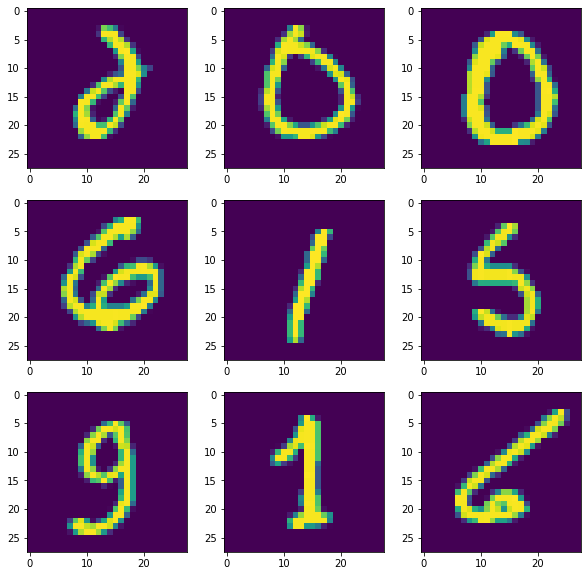

In [3]:
# Use this to generate random integers between [0, training_digits.shape[0]]
figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for row in axes:
    for column in row:
        column.imshow(training_digits[randint(0, training_digits.shape[0])])

plt.show()

## Exploratory Analysis

In [4]:
uniques, counts = np.unique(training_labels, return_counts=True)

for unique, count in zip(uniques, counts): 
    print ("Label {} and Count {}".format(unique, count))

Label 0 and Count 5923
Label 1 and Count 6742
Label 2 and Count 5958
Label 3 and Count 6131
Label 4 and Count 5842
Label 5 and Count 5421
Label 6 and Count 5918
Label 7 and Count 6265
Label 8 and Count 5851
Label 9 and Count 5949


## Normalize the dataset

Normalizing the dataset means we have 0 mean and unit variance. This is very important in "preparing" the dataset before feeding it to the ML Algorithm

In [5]:
training_digits = training_digits / 255.0
test_digits = test_digits / 255.0

## Build a Simple Feed Forward NN

In [6]:
model = tf.keras.models.Sequential()
# Flatten each 28 x 28 square image into a 784 dimensional vector
model.add(tf.keras.layers.Flatten())
# Accepts input of form (784, *) and outputs a matrix with dimension (128, *)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Accepts input of form (128, *) and outputs a matrix with dimension (10, *)
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

### Provide the optimizer and loss function

In [7]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Experiment with callbacks

We can use callback to stop training when certain conditions are met. For more details read [this](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)

In [8]:
class ExperimentalCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # Want my model to be 94% accurate
        if (logs["accuracy"] >= 0.94):
            self.model.stop_training = True

### Train the Neural Network

In [10]:
callbacks = ExperimentalCallback()
model.fit(training_digits, training_labels, epochs=30, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2570 - accuracy: 0.9271
Epoch 2/30
60000/60000 [==============================] - 2s 38us/sample - loss: 0.1151 - accuracy: 0.9660


### Evaluate the model

In [12]:
model.evaluate(test_digits, test_labels)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.0994 - accuracy: 0.9710


[0.09941574507057667, 0.971]

## Model prediction

A prediction is an array of numbers. In this case they represent the model's "confidence" that the image corresponds to each of the 10 different digits.

[[1.9013612e-05 1.7534161e-07 3.1468185e-04 1.1067115e-03 8.7333420e-09
  5.8993737e-06 8.2519830e-10 9.9854028e-01 2.6325370e-06 1.0684820e-05]]

Image most resembles digit = 7

Real world digit = 7

Actual Image



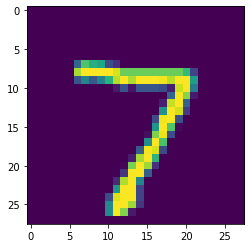

In [13]:
# We need to do this because the NN expects inputs of form (*, (28, 28))
single_test_example = test_digits[0].reshape(1, test_digits[0].shape[0], test_digits[0].shape[1])

# Compute the model's prediction
prediction = model.predict(single_test_example)
print (prediction)

# Which label has the highest confidence value
print ()
print ("Image most resembles digit = {}".format(np.argmax(prediction[0])))

# Test this prediction in the real world
print ()
print ("Real world digit = {}".format(test_labels[0]))

# Plot the image
print ()
print ("Actual Image")
print ()
plt.imshow(test_digits[0])
plt.show()